# Seeds Dataset classification with KNN algorithm
[EDA for This dataset](https://github.com/romilsiddhapura/ml_practices_2018/blob/master/Labs/Lab1/Romil/Notebooks/Seeds_EDA.ipynb)  
[Data for the same](https://github.com/romilsiddhapura/ml_practices_2018/blob/master/Labs/Lab1/Romil/Data/seeds_dataset.csv)

In [1]:
#Importing some necessary packages
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)


from yellowbrick.features import ParallelCoordinates
from yellowbrick import classifier
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix

from imblearn.over_sampling import SMOTE

In [2]:
#reading csv file and adding a column names to it
names = ['Area','Perimeter','Compactness','length_kernel','width_kernel','asy_coefficient','len_kernel_groove','target']
data = pd.read_csv('../../Lab1/Romil/Data/seeds_dataset.csv',header=None,names=names)
data.head()

,Area,Perimeter,Compactness,length_kernel,width_kernel,asy_coefficient,len_kernel_groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
#Selecting Area and asymmetric coefficient as main features
X = data.drop(['target','Perimeter','Compactness','length_kernel','width_kernel','len_kernel_groove'],axis=1).values
y = data.target.values

In [4]:
#Selecting all features
X = data.drop(['target'], axis=1).values
y = data.target.values

In [5]:
#Splitting dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Scaling the training and testing datasets

In [6]:
sc = StandardScaler()
sc.fit(X_train)

# Scaling the train and test sets.
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
#Making a classifier with 10 neighbors
knn = KNeighborsClassifier(n_neighbors=10)
#fitting the model to standardized data
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [8]:
knn.score(X_test_std,y_test)

0.9047619047619048

In [9]:
y_pred = knn.predict(X_test_std)
print(metrics.accuracy_score(y_test,y_pred,normalize = False), 'correctly labelled out of', len(y_test))

57 correctly labelled out of 63


## Plotting decision regions

For plotting the 2-d graph, I have taken Area and asymmetric coefficient as main features and have dropped other features

In [10]:
#Selecting Area and asymmetric coefficient as main features
X = data.drop(['target','Perimeter','Compactness','length_kernel','width_kernel','len_kernel_groove'],axis=1).values
y = data.target.values

In [11]:
#Splitting dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
sc = StandardScaler()
sc.fit(X_train)

# Scaling the train and test sets.
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#Making a classifier with 10 neighbors
knn = KNeighborsClassifier(n_neighbors=10)
#fitting the model to standardized data
knn.fit(X_train_std, y_train)

knn.score(X_test_std,y_test)

0.9206349206349206

In [13]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

In [14]:
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

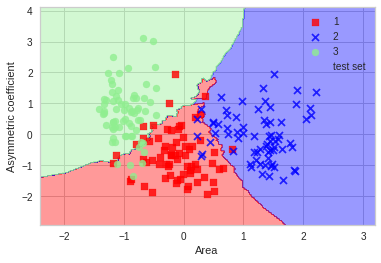

In [15]:
plot_decision_regions(X_combined,
                      y_combined, classifier=knn,
                      test_idx=range(148,210))
plt.xlabel('Area')
plt.ylabel('Asymmetric coefficient')
plt.legend(loc='best')

## Learning curve using sklearn


In [16]:
# Defining the function to plot the learning curve:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

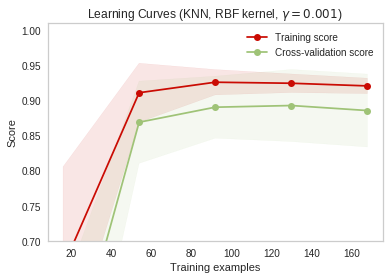

In [17]:
# Plotting for KNearestNeighbours
title = "Learning Curves (KNN, RBF kernel, $\gamma=0.001$)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = KNeighborsClassifier(n_neighbors=10)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

```
Learning curve for training has started to increase little bit earliear than cross-validation. Both stop learning at about 50 training examples.
```

## Confusion matrix and Classification report

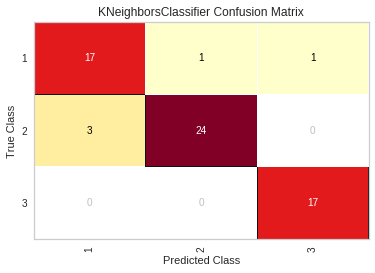

In [18]:
#Plotting the confusion matrix to understand the true positives and negatives and the false positives and negatives

cm = ConfusionMatrix(knn, classes=[1,2,3])
cm.score(X_test_std, y_test)
cm.poof()

** There are more numbers present in the diagonal which shows good prediction by our model**

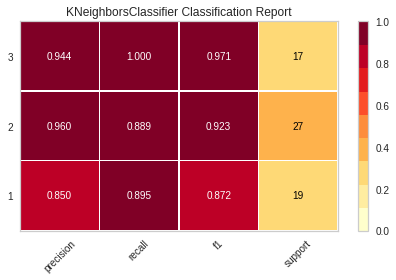

In [19]:

# Generating the classification report containing measures of precision, recall and F1-score

visualizer = ClassificationReport(knn, support=True)

visualizer.fit(X_train_std, y_train)
visualizer.score(X_test_std, y_test)
visualizer.poof()